# Wine dataset - Quality Classification

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. This study aims to search for the elements which effects WINE QUALITY by using decision classification methods such as Support Vector Machines, K-NN, Logistic Regression, Random Forest etc

### About the data

- Type: Two types of wines such as red wine and white wine.
- Fixed acidity: Fixed acid levels in the wine
- Volatile acidity: Volatile acid level in wine
- Citric acid: Citric acid level in wine
- Residual sugar: Refers to the natural sugar from grapes which remains in wine
- Chlorides: Chlorides level in wine
- Free sulfur dioxide: Free sulfur dioxide level in wine
- Total sulfur dioxide: sulfur dioxide level in wine
- Density: density level in wine
- pH: pH level in wine
- Sulphate: sulphate level in wine
- Alcohol: alcohol level in wine
- Quality: Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent)

### Importing the data

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv(r'C:\Users\User\Desktop\Projects\winequality1.csv')
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df.tail()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
df.shape

(6497, 13)

In [4]:
df.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'sulfur_dioxide', 'total_sulfur_dioxide',
       'density', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   sulfur_dioxide        6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Outliers in the column 'residual_sugar', 'sulfur_dioxide' and 'total_sulfur_dioxide'

In [7]:
df.describe(include=['O'])

,type
count,6497
unique,2
top,white
freq,4898


There are 2 unique types of data in the variable 'type' and the most occuring one being white which occur's 4898 out of 6497 

In [8]:
df.isnull().sum() 

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
sulfur_dioxide           0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

There's missing data in many column's

# EDA

### categorizing the quality of the wine into 2 categories 

In [9]:
a=[2,6,9]
label=['bad','good']
df['quality']=pd.cut(df['quality'],bins=a,labels=label)

### Target Variable

In [10]:
df.quality.value_counts()

bad     5220
good    1277
Name: quality, dtype: int64

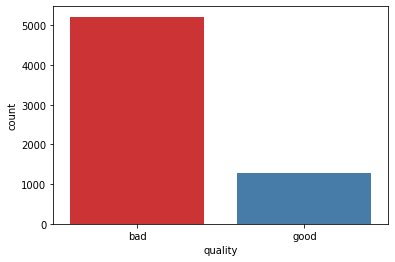

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='quality', palette='Set1')

### Quality 

In [12]:
df.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

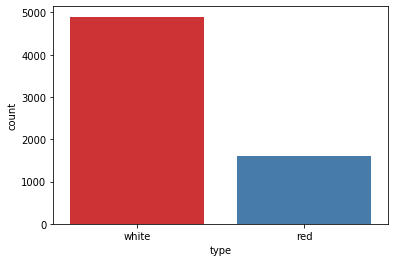

In [13]:
sns.countplot(data=df, x='type', palette='Set1')

### Vzualizing the independent variables

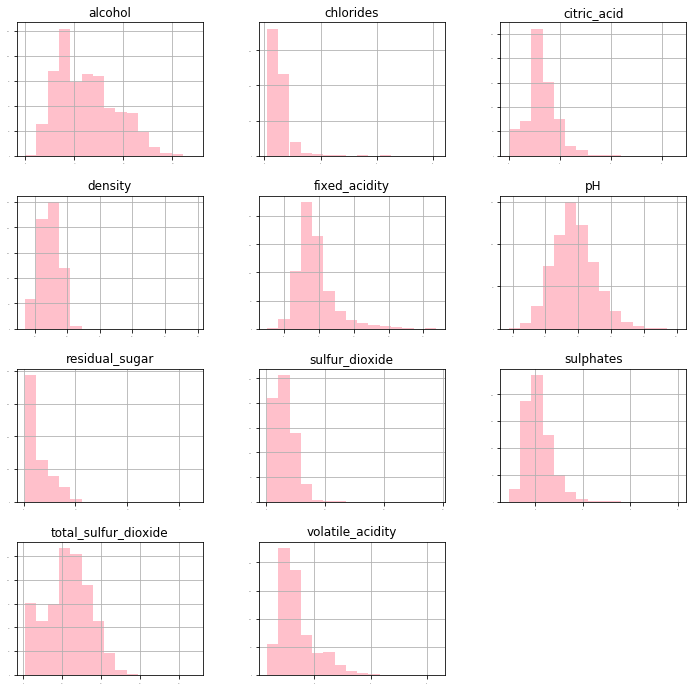

In [14]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12), bins=15, color='pink')
pyplot.show()

### Correlating categorical variables with target variable

### Volatile acidity 

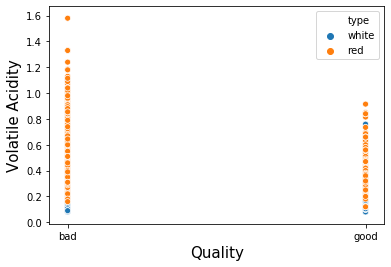

In [15]:
sns.scatterplot(x='quality', y='volatile_acidity', hue='type', data=df)
plt.xlabel('Quality',size=15)
plt.ylabel('Volatile Acidity', size =15)
pyplot.show()

Volatile acidity level is low in both wine classes, especially in white wine while red wine has more in low quality class. Volatile alcohol level is again high in red wine class comparing white wine in low quality.

### Fixed acidity 

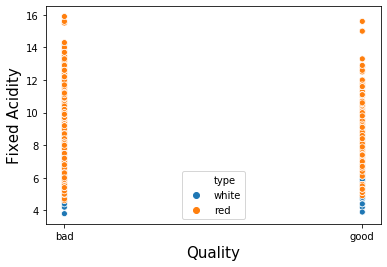

In [16]:
sns.scatterplot(x='quality', y='fixed_acidity', hue='type', data=df)
plt.xlabel('Quality',size=15)
plt.ylabel('Fixed Acidity', size =15)
pyplot.show()

Fixed acidity level is low in both wine classes, especially in white wine while red wine has more in low quality class. Fixed alcohol level is again high in red wine class comparing white wine in low quality.

### Sulfur dioxide Vs Total Sulfur dioxide

Text(0, 0.5, 'sulfur_dioxide')

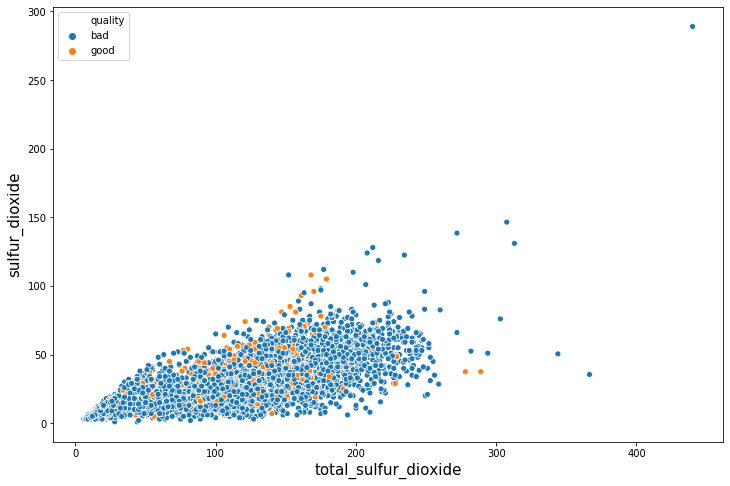

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_sulfur_dioxide', y='sulfur_dioxide', hue='quality',data=df);
plt.xlabel('total_sulfur_dioxide',size=15)
plt.ylabel('sulfur_dioxide', size =15)

There are some extreme values in low quality wine class. Total sulfur dioxide level is getting higher in some low quality wine class while general disturubution is standing up to 100 level of free sulfur dioxide.

### Correlating numerical variables with target variable

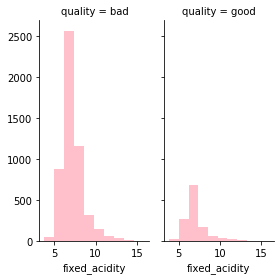

In [18]:
g = sns.FacetGrid(df, col='quality', height=4, aspect=.5)
g.map(plt.hist, 'fixed_acidity', bins=10, color='pink')

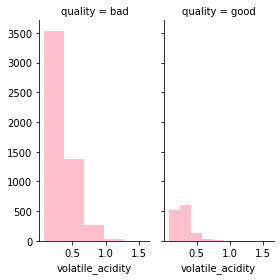

In [19]:
g = sns.FacetGrid(df, col='quality', height=4, aspect=.5)
g.map(plt.hist, 'volatile_acidity', bins=5, color='pink')

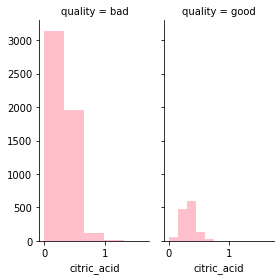

In [20]:
g = sns.FacetGrid(df, col='quality', height=4, aspect=.5)
g.map(plt.hist, 'citric_acid', bins=5, color='pink')

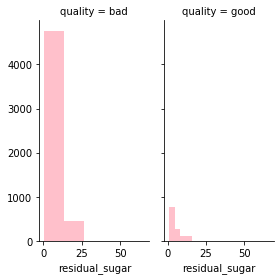

In [21]:
g = sns.FacetGrid(df, col='quality', height=4, aspect=.5)
g.map(plt.hist, 'residual_sugar', bins=5, color='pink')

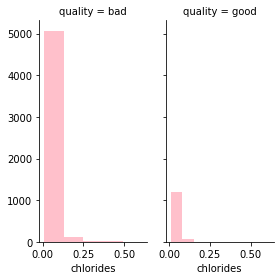

In [22]:
g = sns.FacetGrid(df, col='quality', height=4, aspect=.5)
g.map(plt.hist, 'chlorides', bins=5, color='pink')

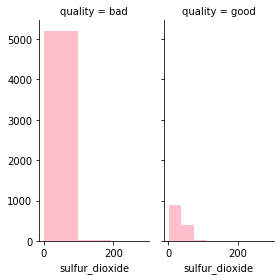

In [23]:
g = sns.FacetGrid(df, col='quality', height=4, aspect=.5)
g.map(plt.hist, 'sulfur_dioxide', bins=3, color='pink')

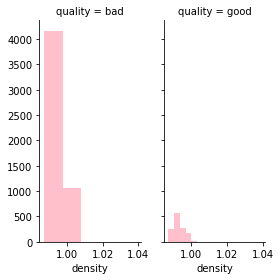

In [24]:
g = sns.FacetGrid(df, col='quality', height=4, aspect=.5)
g.map(plt.hist, 'density', bins=5, color='pink')

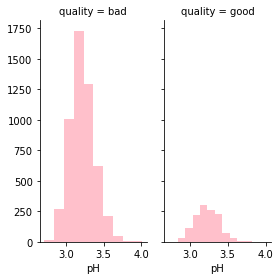

In [25]:
g = sns.FacetGrid(df, col='quality', height=4, aspect=.5)
g.map(plt.hist, 'pH', bins=10, color='pink')

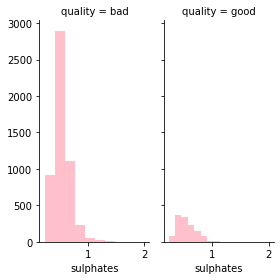

In [26]:
g = sns.FacetGrid(df, col='quality', height=4, aspect=.5)
g.map(plt.hist, 'sulphates', bins=10, color='pink')

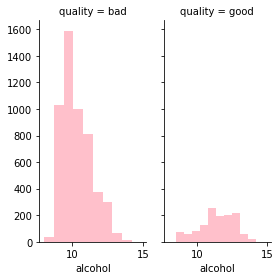

In [27]:
g = sns.FacetGrid(df, col='quality', height=4, aspect=.5)
g.map(plt.hist, 'alcohol', bins=10, color='pink')

The age of the youngest person to survives is 1 and oldest is 80

### Handling Missing Values

In [28]:
df.isnull().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
sulfur_dioxide           0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [29]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

df['fixed_acidity']=imp.fit_transform(df['fixed_acidity'].values.reshape(-1,1))
df['volatile_acidity']=imp.fit_transform(df['volatile_acidity'].values.reshape(-1,1))
df['citric_acid']=imp.fit_transform(df['citric_acid'].values.reshape(-1,1))
df['residual_sugar']=imp.fit_transform(df['residual_sugar'].values.reshape(-1,1))
df['chlorides']=imp.fit_transform(df['chlorides'].values.reshape(-1,1))
df['pH']=imp.fit_transform(df['pH'].values.reshape(-1,1))
df['sulphates']=imp.fit_transform(df['sulphates'].values.reshape(-1,1))

In [30]:
df.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
sulfur_dioxide          0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Mapping Categorical variables to numerical values

### Mapping 'type'

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type']=le.fit_transform(df['type'])
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,bad
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,bad
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,bad
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad


### Checking for Skewness

In [32]:
df.skew()

type                   -1.179095
fixed_acidity           1.724131
volatile_acidity        1.496433
citric_acid             0.473142
residual_sugar          1.435221
chlorides               5.400680
sulfur_dioxide          1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.387234
sulphates               1.799021
alcohol                 0.565718
dtype: float64

Skewness is very high in SibSp, Parch, Embarked and Fare

In [33]:
x = df.drop(columns=['quality'])
y = df[['quality']]

for col in x.columns:
    if df.skew().loc[col]>0.75:
        df[col]=np.log1p(df[col])

In [34]:
df.skew()

type                   -1.179095
fixed_acidity           0.976646
volatile_acidity        1.127704
citric_acid             0.473142
residual_sugar          0.414160
chlorides               4.485181
sulfur_dioxide         -0.721434
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.387234
sulphates               1.099792
alcohol                 0.565718
dtype: float64

### Correlation 

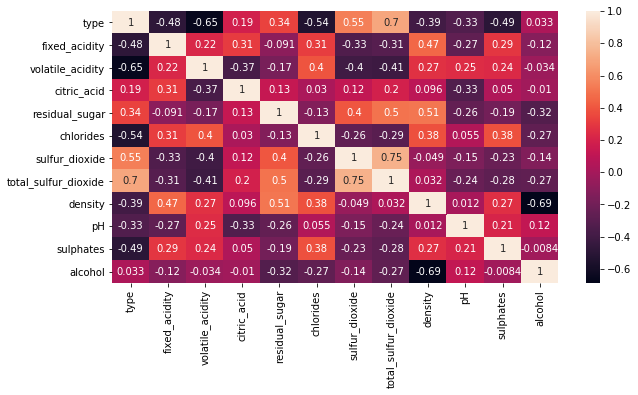

In [35]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
correlation = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot= True)

density and residual column variables need to be dropped from the dataset because they are behaving negatively with the target variable

In [36]:
df.drop(['density','residual_sugar'],axis=1,inplace=True)

In [37]:
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,chlorides,sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,1,2.079442,0.239017,0.36,0.044017,3.828641,170.0,3.00,0.371564,8.8,bad
1,1,1.987874,0.262364,0.34,0.047837,2.708050,132.0,3.30,0.398776,9.5,bad
2,1,2.208274,0.246860,0.40,0.048790,3.433987,97.0,3.26,0.364643,10.1,bad
3,1,2.104134,0.207014,0.32,0.056380,3.871201,186.0,3.19,0.336472,9.9,bad
4,1,2.104134,0.207014,0.32,0.056380,3.871201,186.0,3.19,0.336472,9.9,bad


# Model Building

In [38]:
x = df.drop(columns=['quality'])
y = df[['quality']]

In [39]:
x.shape, y.shape

((6497, 10), (6497, 1))

### Checking for variable importance

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.00956715 0.08888998 0.10656024 0.09338377 0.09708517 0.09332376
 0.09972429 0.09498778 0.10033815 0.21613969]


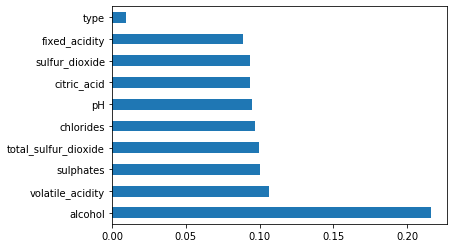

In [41]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(model.feature_importances_,index =x.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

In [42]:
df.drop(['citric_acid','fixed_acidity','type'],axis=1,inplace=True)

In [43]:
df.head()

,volatile_acidity,chlorides,sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0.239017,0.044017,3.828641,170.0,3.00,0.371564,8.8,bad
1,0.262364,0.047837,2.708050,132.0,3.30,0.398776,9.5,bad
2,0.246860,0.048790,3.433987,97.0,3.26,0.364643,10.1,bad
3,0.207014,0.056380,3.871201,186.0,3.19,0.336472,9.9,bad
4,0.207014,0.056380,3.871201,186.0,3.19,0.336472,9.9,bad


In [44]:
from scipy.stats import zscore
z = np.abs(zscore(x))

In [45]:
threshold = 3
print(np.where(z>3))

(array([  40,   41,  194,  195,  196,  207,  250,  325,  372,  484,  531,
        600,  683,  687,  729,  745,  830,  834,  859,  946, 1034, 1051,
       1158, 1163, 1217, 1250, 1255, 1272, 1369, 1385, 1417, 1526, 1551,
       1598, 1599, 1638, 1681, 1722, 1775, 1835, 1856, 1865, 1900, 1925,
       1926, 1931, 1951, 2024, 2025, 2026, 2036, 2050, 2127, 2154, 2186,
       2186, 2286, 2321, 2349, 2441, 2465, 2466, 2654, 2704, 2705, 2711,
       2771, 2781, 2820, 2849, 2872, 2964, 3025, 3043, 3064, 3066, 3152,
       3152, 3265, 3283, 3288, 3497, 3668, 3735, 3737, 3848, 3848, 3911,
       3918, 3937, 3972, 4039, 4109, 4173, 4173, 4259, 4259, 4299, 4300,
       4344, 4346, 4470, 4473, 4497, 4582, 4591, 4626, 4632, 4698, 4745,
       4745, 4787, 4793, 4794, 4886, 4899, 4911, 4912, 4913, 4915, 4915,
       4917, 4917, 4936, 4936, 4940, 4941, 4943, 4944, 4977, 4979, 4979,
       4981, 4981, 4984, 4986, 4989, 4990, 4992, 4992, 4993, 4996, 5004,
       5004, 5018, 5018, 5024, 5025, 5032, 5045, 5

In [46]:
data = df[(z<3).all(axis=1)]

In [47]:
data.shape, x.shape

((6120, 8), (6497, 10))

In [48]:
data = x

### Scaling the data

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

### Importing metrices

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=47)

In [51]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((5067, 10), (1430, 10), (5067, 1), (1430, 1))

## Logistic Regression

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(train_x, train_y)
pred = lg.predict(test_x)
log = accuracy_score(test_y,pred)*100

print('accuracy score:', log)
print('\n')
print (confusion_matrix(test_y,pred))
print('\n')
print (classification_report(test_y,pred))

accuracy score: 83.006993006993


[[1118   39]
 [ 204   69]]


              precision    recall  f1-score   support

         bad       0.85      0.97      0.90      1157
        good       0.64      0.25      0.36       273

    accuracy                           0.83      1430
   macro avg       0.74      0.61      0.63      1430
weighted avg       0.81      0.83      0.80      1430



## Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
predgnb= gnb.predict(test_x)
gaussian = accuracy_score(test_y,predgnb)*100

print('accuracy score:',gaussian)
print('\n')
print(confusion_matrix(test_y, predgnb))
print('\n')
print(classification_report(test_y, predgnb))

accuracy score: 76.5034965034965


[[927 230]
 [106 167]]


              precision    recall  f1-score   support

         bad       0.90      0.80      0.85      1157
        good       0.42      0.61      0.50       273

    accuracy                           0.77      1430
   macro avg       0.66      0.71      0.67      1430
weighted avg       0.81      0.77      0.78      1430



## SVM - GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
from sklearn.svm import SVC
from sklearn import svm, datasets

parameters = {'kernel':['linear','rbf'], 'C':[1,5,10]}
svc = SVC()
clf = GridSearchCV(svc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'C': 5, 'kernel': 'rbf'}


In [57]:
svc=SVC(kernel='rbf', C=5, probability=True)
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
svcs = accuracy_score(test_y, predsvc)*100

print('accuracy score:',svcs)
print('\n')
print(confusion_matrix(test_y, predsvc))
print('\n')
print(classification_report(test_y, predsvc))

accuracy score: 84.12587412587412


[[1115   42]
 [ 185   88]]


              precision    recall  f1-score   support

         bad       0.86      0.96      0.91      1157
        good       0.68      0.32      0.44       273

    accuracy                           0.84      1430
   macro avg       0.77      0.64      0.67      1430
weighted avg       0.82      0.84      0.82      1430



## Decision Tree - GridSearchCV

In [58]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini','entropy']}
dtc =DecisionTreeClassifier()
clf = GridSearchCV(dtc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'gini'}


In [59]:
dtc =DecisionTreeClassifier(criterion='gini')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
decision_e = accuracy_score(test_y, preddtc)*100

print('accuracy score:',decision_e )
print('\n')
print(confusion_matrix(test_y, preddtc))
print('\n')
print(classification_report(test_y, preddtc))

accuracy score: 84.47552447552448


[[1042  115]
 [ 107  166]]


              precision    recall  f1-score   support

         bad       0.91      0.90      0.90      1157
        good       0.59      0.61      0.60       273

    accuracy                           0.84      1430
   macro avg       0.75      0.75      0.75      1430
weighted avg       0.85      0.84      0.85      1430



## RandomForest - GridSearchCV

In [60]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':[100,300,500], 'random_state': [40,45,50,55,60,65,70,75]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'n_estimators': 500, 'random_state': 45}


In [61]:
rf = RandomForestClassifier(n_estimators=500,random_state=45) 
rf.fit(train_x,train_y)
predrf = rf.predict(test_x)
random = accuracy_score(test_y,predrf)*100

print('accuracy score:',random)
print('\n')
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

accuracy score: 89.23076923076924


[[1121   36]
 [ 118  155]]
              precision    recall  f1-score   support

         bad       0.90      0.97      0.94      1157
        good       0.81      0.57      0.67       273

    accuracy                           0.89      1430
   macro avg       0.86      0.77      0.80      1430
weighted avg       0.89      0.89      0.88      1430



## KNN - GridSearchCV

In [62]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [5,10,15,20,25,30]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'n_neighbors': 10}


In [63]:
knn = KNeighborsClassifier(n_neighbors =10)
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
predknn = knn.predict(test_x)
knn_a = accuracy_score(test_y, predknn)*100

print('accuracy score:',knn_a)
print('\n')
print(confusion_matrix(test_y, predknn))
print('\n')
print(classification_report(test_y, predknn))

accuracy score: 83.77622377622377


[[1094   63]
 [ 169  104]]


              precision    recall  f1-score   support

         bad       0.87      0.95      0.90      1157
        good       0.62      0.38      0.47       273

    accuracy                           0.84      1430
   macro avg       0.74      0.66      0.69      1430
weighted avg       0.82      0.84      0.82      1430



### Picking the best model

In [64]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', ' Gaussian Naive Bayes',
              'Decision Tree'],
    'Score': [svcs,knn_a,log,random,gaussian,decision_e]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.230769
5,Decision Tree,84.475524
0,Support Vector Machines,84.125874
1,KNN,83.776224
2,Logistic Regression,83.006993
4,Gaussian Naive Bayes,76.503497


## Saving the best model

In [65]:
import pickle

filename = 'wine_pred.pkl'
pickle.dump(random, open(filename, 'wb'))